___
<h1 style="color:blue;">Gaussian Mixture Clustering</h1>

___


## Introduction to Gaussian Mixture Clustering

Gaussian Mixture Clustering is a probabilistic clustering algorithm that assumes that the data points are generated from a mixture of several Gaussian distributions with unknown parameters. The algorithm aims to estimate these parameters and assign each data point to one of the Gaussian distributions, thereby clustering the data.

## Key Concepts

1. **Gaussian Distribution**: A continuous probability distribution that is characterized by its mean and variance. It is often represented as a bell-shaped curve.
2. **Mixture Model**: A statistical model that represents the probability distribution of a random variable as a mixture of several component distributions.
3. **Expectation-Maximization (EM) Algorithm**: An iterative algorithm used to estimate the parameters of statistical models, especially in the presence of latent variables.
4. **Cluster Assignment**: The process of assigning data points to clusters based on the estimated parameters of the Gaussian distributions.
5. **Soft Clustering**: A type of clustering where each data point is assigned a probability of belonging to each cluster, rather than a hard assignment to a single cluster.
6. **Hyperparameters**: Parameters that are set before the learning process begins, such as the number of clusters or the convergence criteria.
7. **Convergence Criteria**: The condition that determines when the EM algorithm has reached a stable solution, often based on the change in log-likelihood between iterations.
8. **Initialization**: The process of setting the initial values of the parameters before running the EM algorithm.
9. **Covariance Matrix**: A matrix that describes the variance of each variable and the covariance between variables in a multivariate Gaussian distribution.

## Algorithm

The Gaussian Mixture Clustering algorithm can be summarized in the following steps:

1. **Initialization**: Choose the number of clusters (components) and initialize the parameters of the Gaussian distributions (means, covariances, and mixing coefficients).
2. **Expectation Step (E-step)**: Compute the probability of each data point belonging to each cluster using the current parameter estimates.
3. **Maximization Step (M-step)**: Update the parameters of the Gaussian distributions by maximizing the likelihood of the data given the cluster assignments.
4. **Convergence**: Repeat the E-step and M-step until the algorithm converges, i.e., the change in log-likelihood is below a predefined threshold.
5. **Cluster Assignment**: Assign each data point to the cluster with the highest probability.
6. **Soft Clustering**: Optionally, compute the probability of each data point belonging to each cluster for soft clustering.

## Iris Dataset Overview

### Description
The Iris dataset is a classic and well-known dataset in machine learning and statistics. It was introduced by the British statistician and biologist Ronald Fisher in 1936. The dataset is often used for demonstrating various machine learning algorithms and statistical techniques due to its simplicity and effectiveness in testing classification problems.

### Content
The Iris dataset consists of 150 instances, where each instance represents a different iris flower. There are three classes (species) of iris plants in the dataset, each represented by 50 instances:
- Iris Setosa
- Iris Versicolor
- Iris Virginica

For each instance, the following four features are recorded:
1. Sepal Length (in cm)
2. Sepal Width (in cm)
3. Petal Length (in cm)
4. Petal Width (in cm)

### Purpose
The main purpose of the Iris dataset is to test classification algorithms. Given the four features of an iris flower, the goal is to predict its species among the three classes. This dataset is particularly useful for:
- Demonstrating supervised learning algorithms (e.g., classification) due to the labeled nature of the dataset.
- Illustrating data visualization techniques such as scatter plots, pair plots, and decision boundaries.
- Evaluating model performance using metrics like accuracy, precision, recall, and F1-score.

### Source
The dataset is readily available in various machine learning libraries and repositories, including:
- Scikit-learn: `sklearn.datasets.load_iris()`
- UCI Machine Learning Repository: [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris)



___
## <span style="color:blue;">Data Exploration and Preprocessing</span>

___


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

# Load the Iris dataset
iris = load_iris()

# Convert to DataFrame for better visualization (optional)
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


>  Making Histograms of the data to understand the distribution of the data.

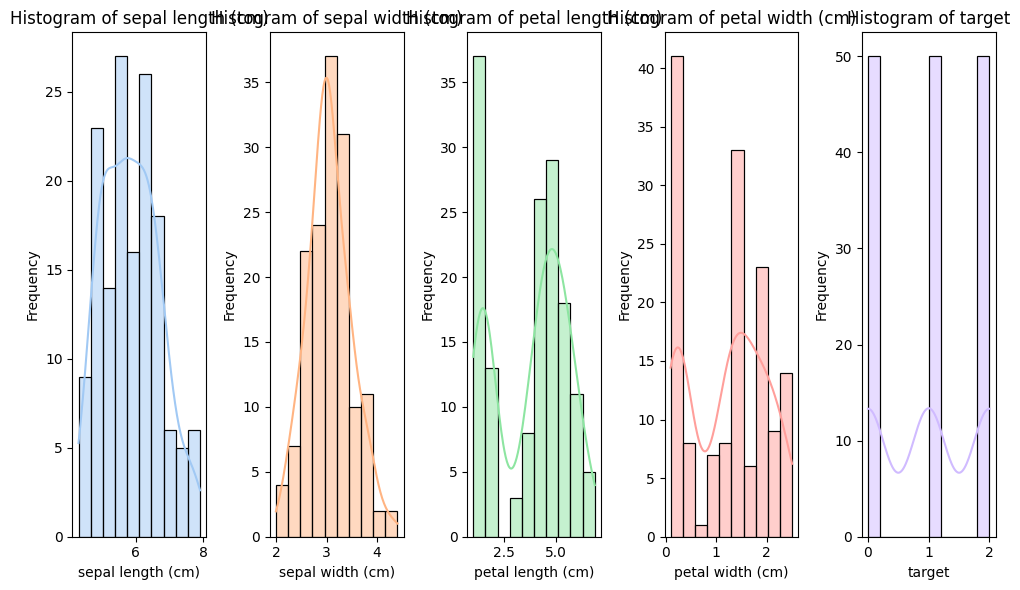

In [2]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(1,5, i + 1)
    sns.histplot(df[col], bins=10, kde=True, color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

> Making box plots to understand the spread of the data.

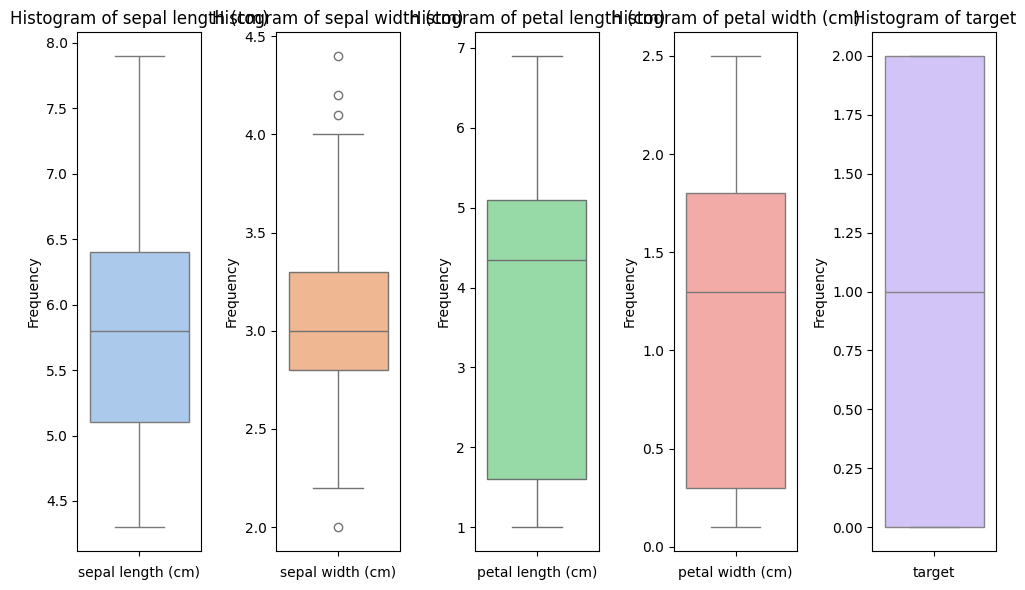

In [3]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(df[col], color=palette[i])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

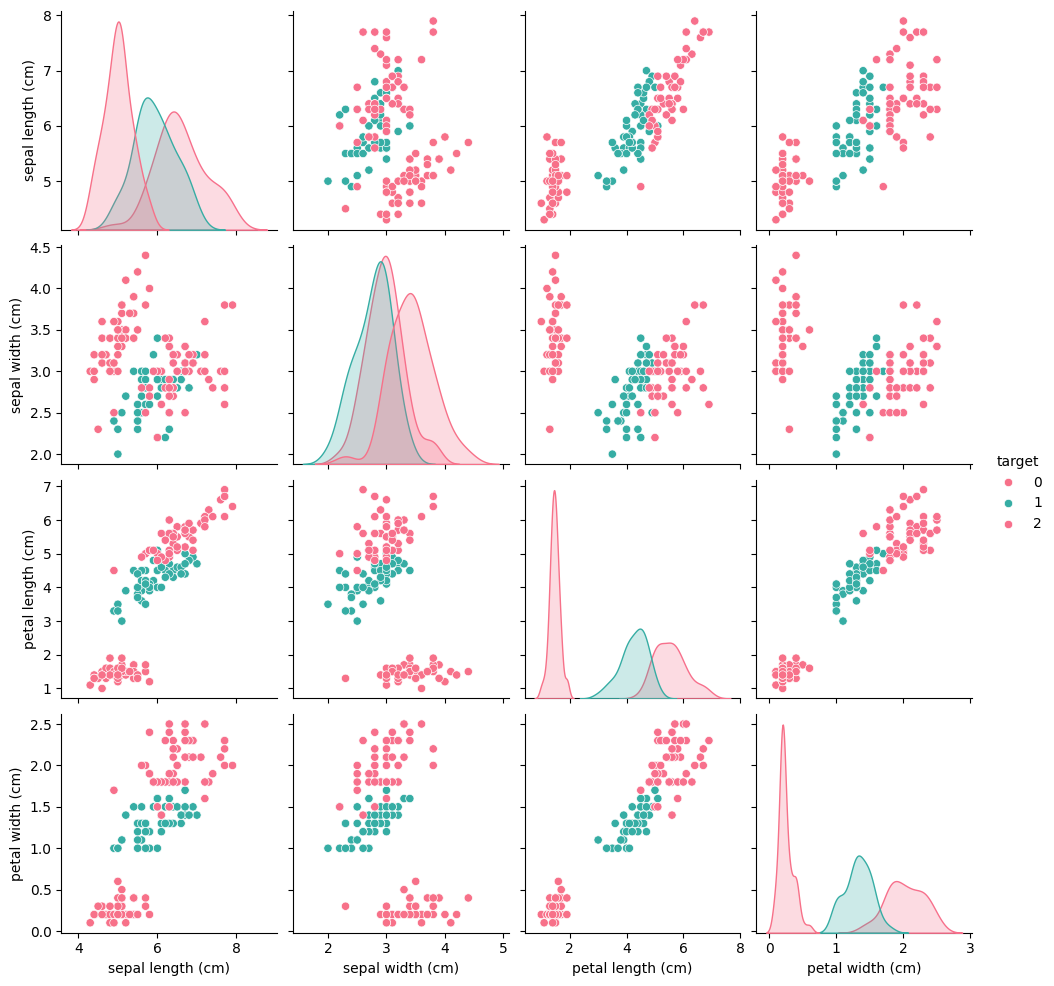

In [4]:
# pairplot
sns.pairplot(df, hue='target', palette='husl')

### Correlation Analysis

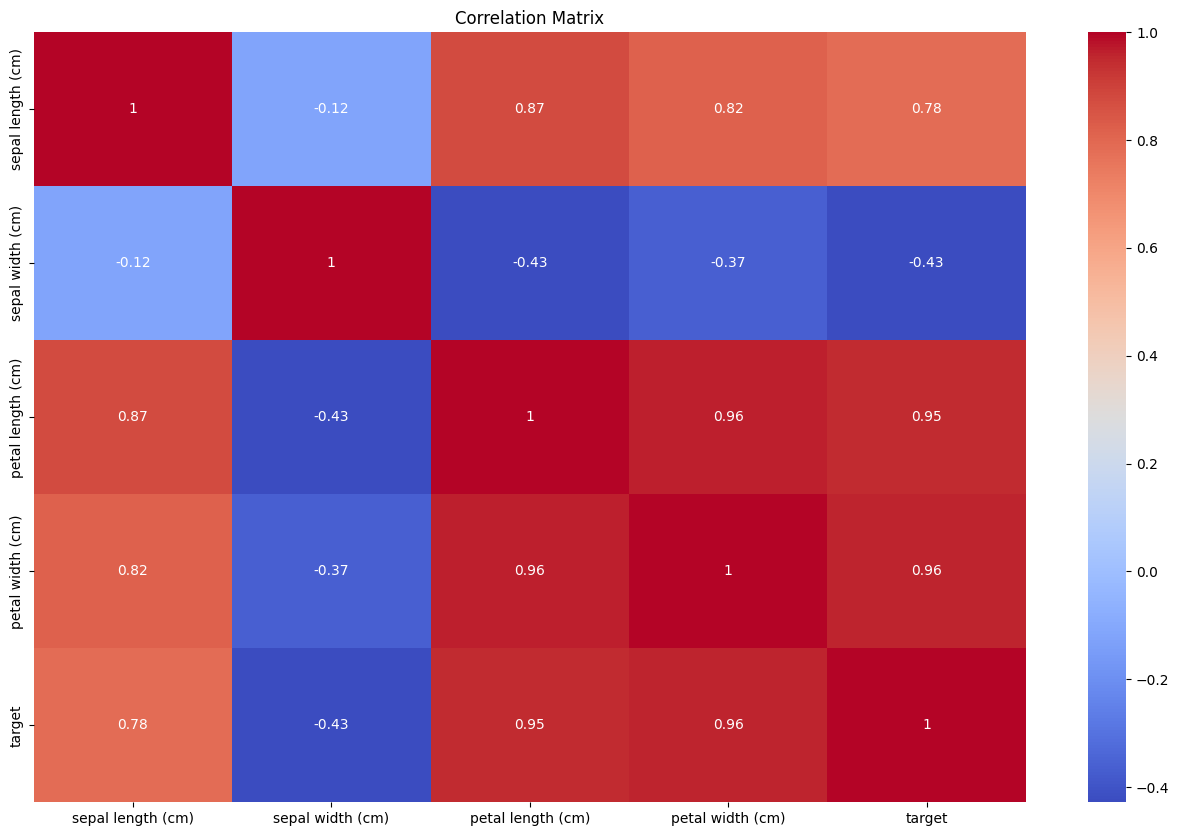

In [5]:
# Calculating the Correlation 
correlation = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

___
## <span style="color:blue;">Model Development</span>
___

### Scikit-learn Gaussian Mixture Clustering Model:

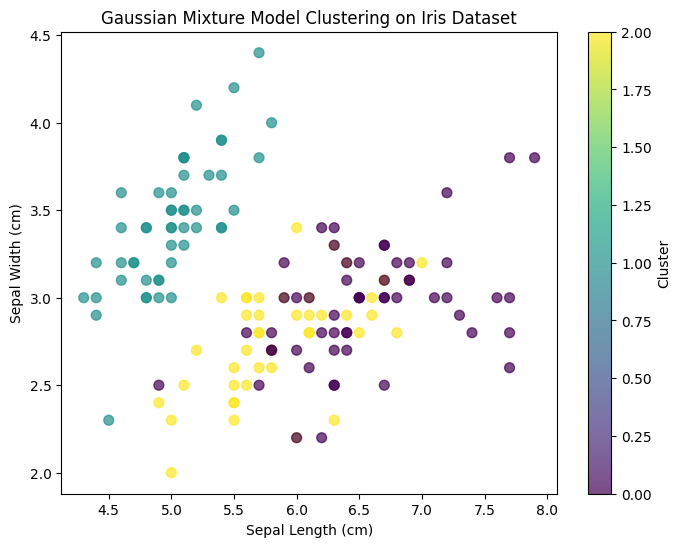

In [6]:
X = iris.data

# Initialize the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)

# Fit the model
gmm.fit(X)

# Predict the cluster labels
labels = gmm.predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plotting the first two features (you can choose any two features)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Gaussian Mixture Model Clustering on Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Cluster')
plt.show()

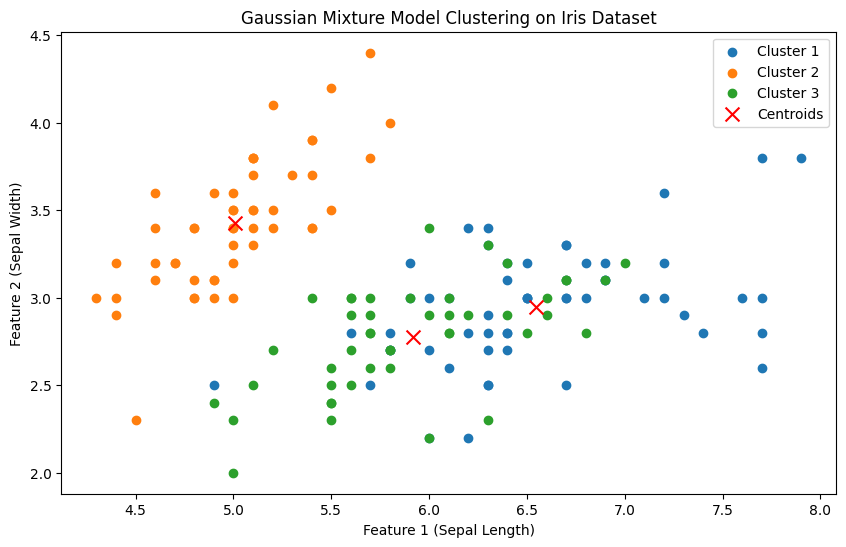

In [7]:
# Visualize the clustering results
plt.figure(figsize=(10, 6))

# Scatter plot for each class
for i in range(3):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i + 1}')

# Plot the centroids of the clusters
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], color='red', marker='x', s=100, label='Centroids')

plt.title('Gaussian Mixture Model Clustering on Iris Dataset')
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.legend()
plt.show()

___
## <span style="color:blue;">Model Evaluation</span>

___

In [8]:
# import metrics for evaluation
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Evaluate clustering performance
silhouette = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.5011761635067206
Calinski-Harabasz Index: 481.78070899745234


---

## <span style="color:blue;"> CONCLUSION </span>

---

### Summary of Gaussian Mixture Model (GMM) Evaluation

The Gaussian Mixture Model (GMM) was applied to the Iris dataset to uncover underlying clusters based on flower characteristics. Here are the key evaluation metrics:

- **Silhouette Score**: The silhouette score measures how similar each point is to its own cluster compared to other clusters. A score closer to 1 indicates dense, well-separated clusters. With a silhouette score of 0.5012, the clusters are moderately well-separated.
  
- **Calinski-Harabasz Index**: This index evaluates the ratio of the sum of between-cluster dispersion to within-cluster dispersion. A higher value indicates dense and well-separated clusters. The index of 481.7807 suggests good clustering performance.

### Insights and Recommendations

Based on the evaluation metrics:

- The Gaussian Mixture Model (GMM) performed reasonably well in clustering the Iris dataset, with moderate to good scores on both the silhouette score and Calinski-Harabasz index.
  
- Further exploration could involve adjusting the number of components in the GMM to potentially improve clustering performance.
  
- Visualization of the clusters showed distinct separation, particularly in the sepal length and sepal width dimensions, indicating meaningful clustering patterns.

### Acknowledgments

- **Data Source**: The Iris dataset used in this analysis is a well-known dataset available in the scikit-learn library, commonly used for educational and benchmarking purposes in machine learning.

- **Tools**: Python, scikit-learn, Matplotlib, and NumPy were used for data preprocessing, model training, evaluation, and visualization.

Overall, the Gaussian Mixture Model (GMM) successfully identified natural groupings within the Iris dataset based on flower measurements, demonstrating its effectiveness in unsupervised learning tasks.
